In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator


In [10]:
trainData = ImageDataGenerator()
trainingdt = trainData.flow_from_directory(directory='RealvsFake/Training', target_size=(224,224))


Found 101965 images belonging to 2 classes.


In [6]:
testData = ImageDataGenerator()
testingdt = testData.flow_from_directory(directory='RealvsFake/Testing', target_size=(224,224))


Found 20076 images belonging to 2 classes.


In [7]:
def preprocess(file_path):
        byte_img = tf.io.read_file(file_path)
        img = tf.io.decode_jpeg(byte_img)
        img = tf.image.resize(img, (224,224))
        img = img / 255.0
        return img

In [23]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='max',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [24]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(2, activation='softmax'))

In [25]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 512)               1049088   
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 24,900,482
Trainable params: 1,312,770
Non-trainable params: 23,587,712
_________________________________________________________________


In [29]:
resnet_model.compile(optimizer=Adam(lr=3e-4),loss='categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(trainingdt, validation_data=testingdt, epochs=10, steps_per_epoch=100, validation_steps=10)

Epoch 1/10
100/100 [==============================] - 375s 4s/step - loss: 0.4862 - accuracy: 0.7816 - val_loss: 0.4091 - val_accuracy: 0.8156
Epoch 2/10
100/100 [==============================] - 378s 4s/step - loss: 0.4309 - accuracy: 0.8037 - val_loss: 0.5147 - val_accuracy: 0.7656
Epoch 3/10
100/100 [==============================] - 372s 4s/step - loss: 0.4231 - accuracy: 0.8069 - val_loss: 0.3764 - val_accuracy: 0.8500
Epoch 4/10
100/100 [==============================] - 340s 3s/step - loss: 0.4345 - accuracy: 0.7959 - val_loss: 0.4151 - val_accuracy: 0.8313
Epoch 5/10
100/100 [==============================] - 340s 3s/step - loss: 0.4140 - accuracy: 0.8109 - val_loss: 0.5117 - val_accuracy: 0.7500
Epoch 6/10
100/100 [==============================] - 340s 3s/step - loss: 0.4312 - accuracy: 0.8003 - val_loss: 0.4307 - val_accuracy: 0.7969
Epoch 7/10
100/100 [==============================] - 8808s 89s/step - loss: 0.4257 - accuracy: 0.8056 - val_loss: 0.3765 - val_accuracy: 0.84

In [30]:
resnet_model.save('resnet50.h5')

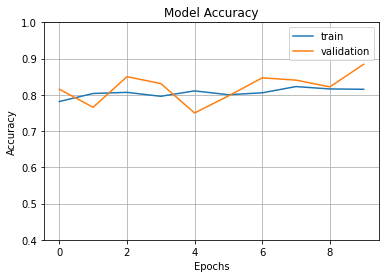

In [31]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
steps_per_epoch = 100
predictions = resnet_model.predict(testingdt, steps= steps_per_epoch)

predicted_classes = np.argmax(predictions, axis=1)
true_classes = testingdt.classes
class_labels = list(testingdt.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)   

cm=confusion_matrix(true_classes,predicted_classes)
print(cm)

ValueError: Found input variables with inconsistent numbers of samples: [20076, 3200]